Now that we have extracted features from our original dataset, we need to do some Exploratory Data Analysis (EDA) in order to asses the quality of the extracted features and decided we need to perform any of these:
- Feature Scaling
- Feature Transformation
- Feature Engineering

In [1]:
import sys
import os

repository_root_directory = os.path.dirname(os.getcwd())
rrd = "repository_root_directory:\t"
print(rrd, repository_root_directory)

if repository_root_directory not in sys.path:
    sys.path.append(repository_root_directory)
    print(rrd, "added to path")
else:  
    print(rrd, "already in path")

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

repository_root_directory:	 /teamspace/studios/this_studio/csc_461_fp
repository_root_directory:	 added to path


In [18]:
gtzan_features_path = '../_03_data_gtzan_features_labels.xlsx'      # Path to the GTZAN features file
gtzan_features_file = pd.ExcelFile(gtzan_features_path)             # Load the Excel file
gtzan_features_file.sheet_names                                     # See all sheet names               
sheet_data = gtzan_features_file.parse('Sheet1')                    # Load the data from the first sheet
sheet_data.head()                                                   # Display the first few rows: default is 5 rows                     


,RMS,ZCR,Spectral_Centroid,Spectral_Bandwidth,Spectral_Rolloff,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Chroma_4,Chroma_5,Chroma_6,Chroma_7,Chroma_8,Chroma_9,Chroma_10,Chroma_11,Chroma_12,Genre
0,0.147038,0.083045,1784.158246,2002.506999,3805.806298,-101.635178,121.570648,-19.162310,42.364071,-6.362351,...,0.244692,0.247862,0.335616,0.364619,0.435684,0.295985,0.315080,0.407008,0.385101,0
1,0.140256,0.056040,1530.406302,2039.316747,3550.946767,-170.173401,123.984703,8.947046,35.867355,2.909244,...,0.211472,0.200789,0.330795,0.397379,0.560356,0.384180,0.255326,0.284775,0.334094,0
2,0.206913,0.076291,1552.861222,1747.840170,3042.435096,-74.561050,140.440796,-29.084536,31.686720,-13.976517,...,0.407986,0.546820,0.321699,0.304657,0.288403,0.334152,0.401819,0.384389,0.588508,0
3,0.166737,0.033309,1070.285162,1596.858622,2185.012258,-183.127335,150.085907,5.663642,26.855532,1.769984,...,0.547012,0.657074,0.511523,0.355554,0.251613,0.246270,0.315112,0.316579,0.383199,0
4,0.106448,0.101461,1835.232440,1748.689585,3580.090700,-145.485397,126.209587,-35.580669,22.139540,-32.473171,...,0.255827,0.192664,0.530221,0.253779,0.139121,0.276424,0.324326,0.555123,0.272931,0


In [19]:
summary_stats_path = '../_04_summary_statistics_gtzan_features_labels.xlsx'     # Path to the summary statistics file
summary_stats = sheet_data.describe()                                           # Get the summary statistics of the data
summary_stats.to_excel(summary_stats_path)                                      # Save the summary statistics to an Excel file
data = pd.ExcelFile(summary_stats_path)                                         # Load the Excel file
data.sheet_names                                                                # See all sheet names
sheet1_df = data.parse('Sheet1')                                                # Load the data from the first sheet
num_rows = sheet1_df.shape[0]                                                   # Get the number of rows in the data
sheet1_df.head(num_rows)                                                        # Display all rows


,Unnamed: 0,RMS,ZCR,Spectral_Centroid,Spectral_Bandwidth,Spectral_Rolloff,MFCC_1,MFCC_2,MFCC_3,MFCC_4,...,Chroma_4,Chroma_5,Chroma_6,Chroma_7,Chroma_8,Chroma_9,Chroma_10,Chroma_11,Chroma_12,Genre
0,count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,mean,0.161560,0.103622,2202.096020,2242.955705,4572.221942,-113.223955,99.561455,-8.923417,36.293308,...,0.369945,0.387576,0.376572,0.359858,0.393662,0.378014,0.399160,0.375252,0.373526,4.500000
2,std,0.054685,0.041822,715.912318,526.169748,1574.656423,74.532234,31.318136,21.688811,16.662884,...,0.115756,0.120663,0.111364,0.114492,0.115488,0.117619,0.118769,0.115107,0.115730,2.873719
3,min,0.040790,0.021697,570.751656,901.383563,749.698534,-367.956970,-1.471884,-89.864334,-18.756538,...,0.074952,0.070158,0.050617,0.082641,0.068351,0.061411,0.111275,0.061216,0.091698,0.000000
4,25%,0.122724,0.070244,1627.924292,1907.425928,3380.359000,-165.403584,76.779427,-24.217510,24.102556,...,0.288066,0.301770,0.296462,0.283999,0.314467,0.296855,0.313696,0.295076,0.292270,2.000000
5,50%,0.152158,0.099552,2212.359540,2223.835942,4660.751902,-99.173588,98.453869,-10.713522,36.950510,...,0.370238,0.383858,0.376933,0.356783,0.398414,0.376386,0.390894,0.371676,0.373652,4.500000
6,75%,0.193524,0.131944,2691.319263,2578.535843,5533.870830,-57.805912,119.944141,5.504158,48.195828,...,0.444413,0.470693,0.451937,0.431359,0.470599,0.455930,0.482501,0.447758,0.444388,7.000000
7,max,0.397734,0.274631,4435.727333,3509.656096,8677.730976,42.098713,193.074478,56.647980,80.699188,...,0.804350,0.809106,0.703145,0.803614,0.753515,0.776868,0.775460,0.802365,0.796879,9.000000


<Figure size 1800x800 with 0 Axes>

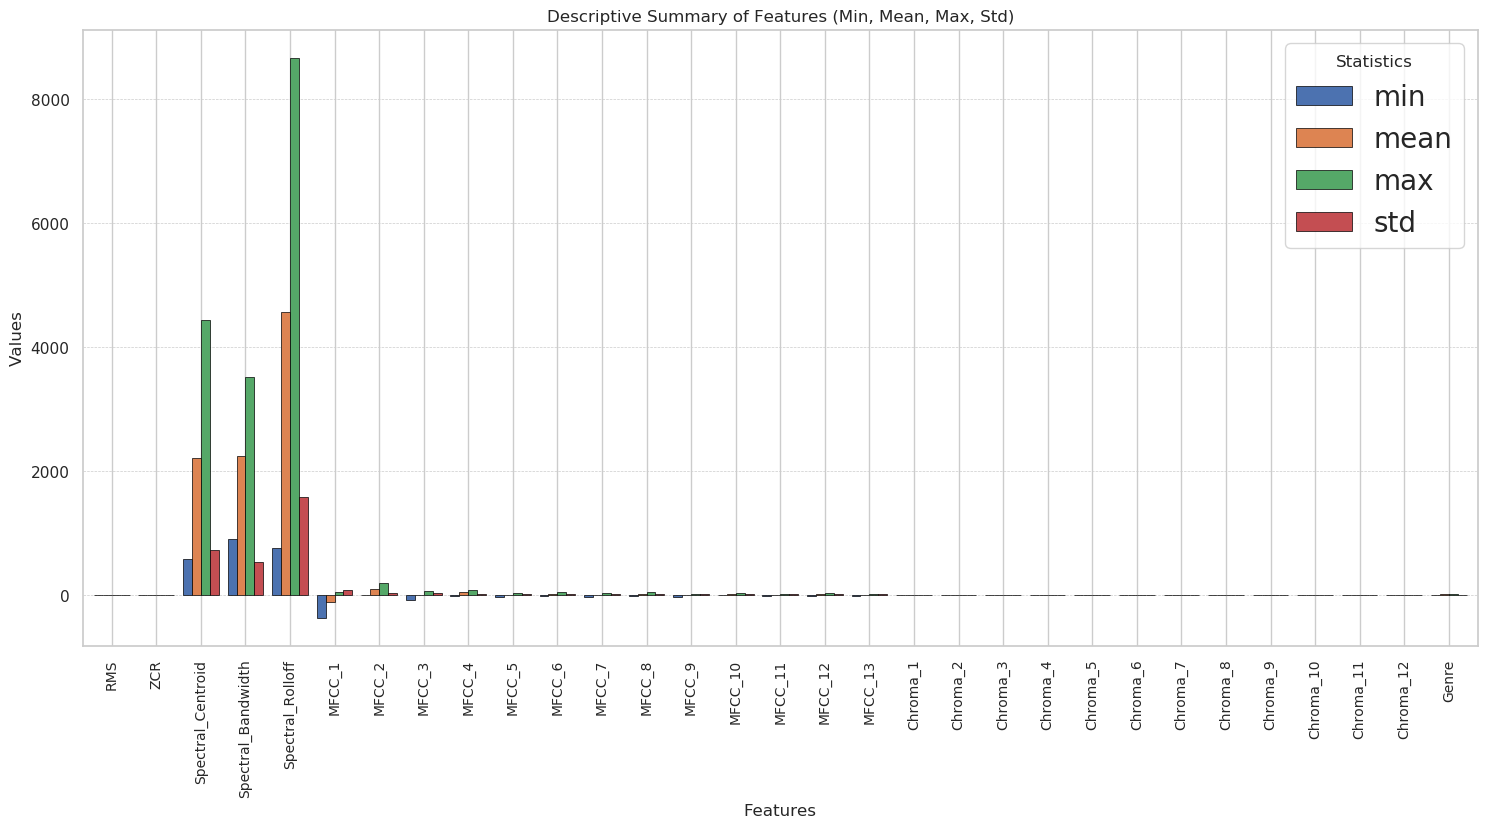

In [38]:
summary_stats_to_plot = summary_stats[['min', 'mean', 'max', 'std']]

# Plot the descriptive statistics with features on the x-axis
plt.figure(figsize=(18, 8))
summary_stats_to_plot.plot(kind='bar', figsize=(18, 8), width=0.8, edgecolor='black', linewidth=0.5)
plt.title("Descriptive Summary of Features (Min, Mean, Max, Std)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=90, fontsize=10)
plt.legend(title="Statistics", fontsize=20)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
#plt.tight_layout()
plt.show()


### Analysis of Descriptive Summary Plot

1. **Outliers**:
    - The presence of outliers can be inferred from the large range (min to max) in some features. The large range is definitely obvious in the plot for the spectral features. It is crucial to handle outliers before applying scaling techniques because: Outliers can skew the mean (for standardization) or the range (for normalization), leading to incorrect scaling, therefore affecting model performance. We can handle outliers by removal or capping.
    The plot suggest that some outliers might exist but we cannot confirm the existence of outliers just based on visual inspection: we need to apply techniques like Z-score and IQR (Inter Quartile Range) for outliers detection:
    https://medium.com/@ayeshasidhikha188/unveiling-outliers-exploring-z-score-and-iqr-methods-for-boxplots-67b0f3086720
    
    
2. **Feature Scaling**:
    - Features like `Spectral_Rolloff`, `Spectral_Centroid`, and `Spectral_Bandwidth` have significantly higher values compared to others. This indicates the need for feature scaling (normalization or standardization) to ensure that these features do not dominate the model training process. The spectral features show high variability (variance) which is confirmed by their high standard deviation. These features might dominate distance-based models like (k-NN, SVM) or gradient-based models if not scaled properly. Algorithms like SVM, k-NN, and neural networks are sensitive to the scale of input features. Ensuring that all features are on a similar scale can lead to better model performance and faster convergence during training.
    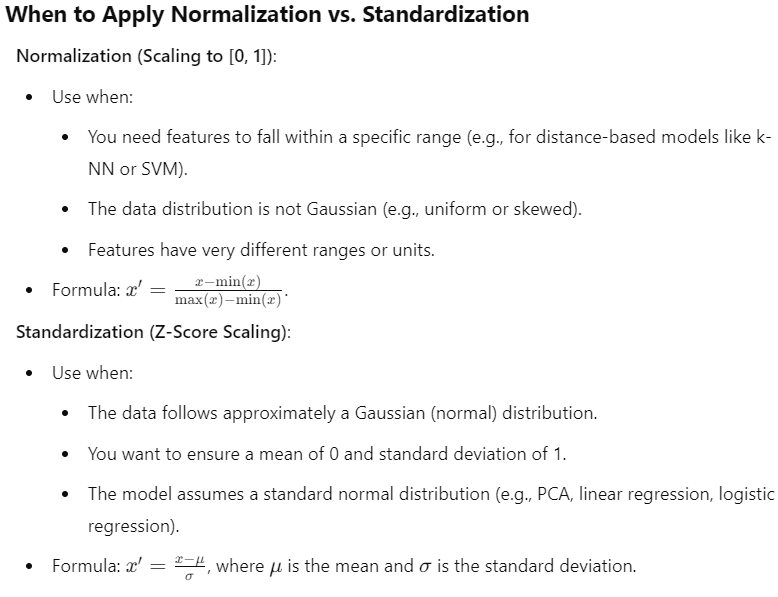


3. **Feature Importance - Random Forest**:
    - Consistent Features
    - Examples: Chroma features (e.g., Chroma_1 to Chroma_12).
    - Insights: These features have relatively small ranges and low standard deviations, indicating consistency across samples.
    - Implications: Consistent features might provide stable information for classification tasks, but low variability could    reduce their discriminative power.
    - Action: use Random Forest first to select the top features, then apply dimensionality reduction techniques (PCA, tsne) on the selected features, if dimension is of concern


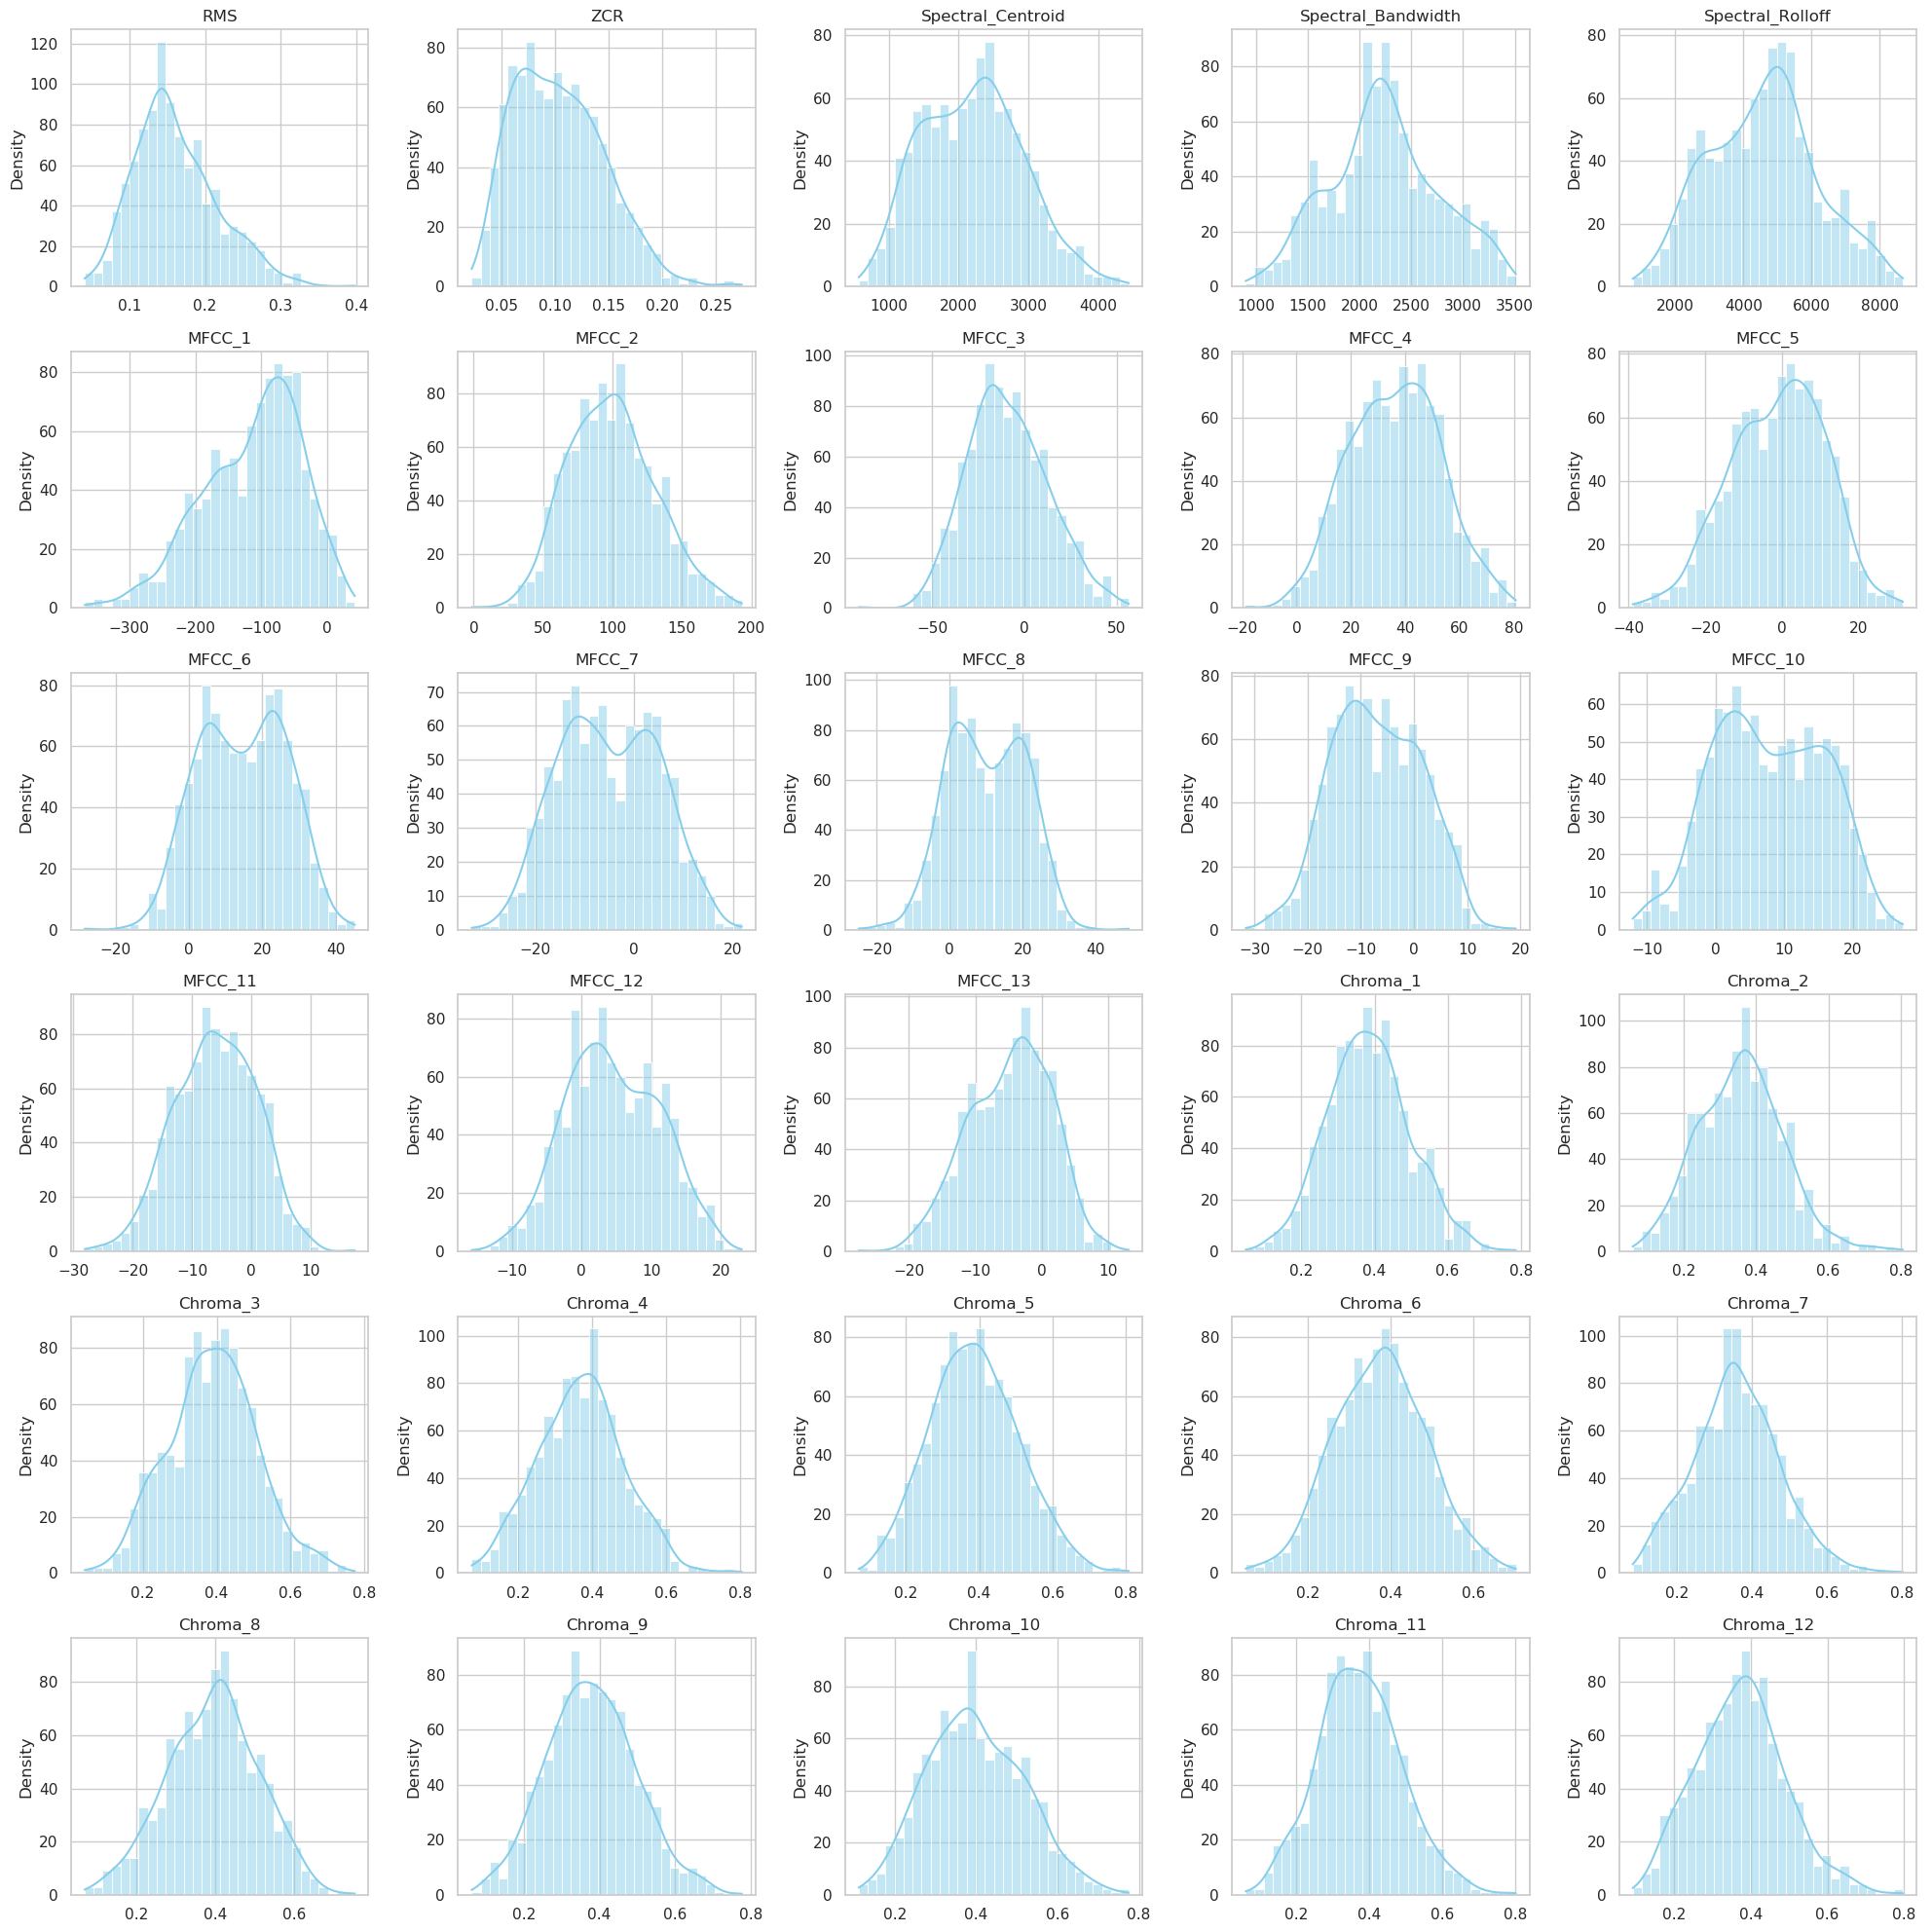

In [ ]:
# visualize the distributions of each feature
num_features = len(sheet_data.columns) - 1  # Exclude the 'Genre' column
cols = 5  # Number of columns in the grid
rows = (num_features // cols) + (num_features % cols > 0)  # Calculate rows needed

plt.figure(figsize=(20, 20))
for i, feature in enumerate(sheet_data.columns[:-1], 1):  # Exclude 'Genre'
    plt.subplot(rows, cols, i)
    sns.histplot(sheet_data[feature], kde=True, bins=30, color='skyblue')
    plt.title(feature)
    plt.xlabel("")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()
